In [3]:
import numpy as np
import pandas as pd
import sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

## Lets take a look on our data files

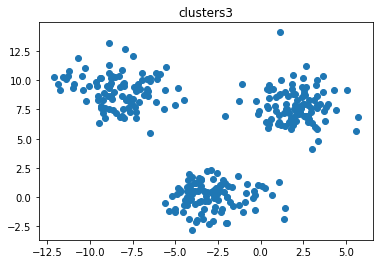

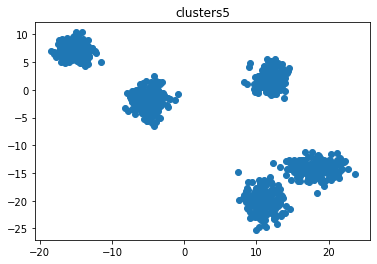

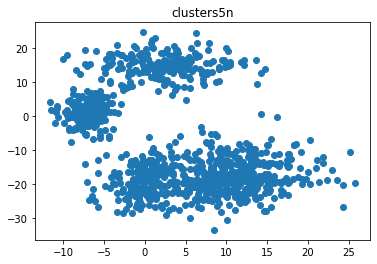

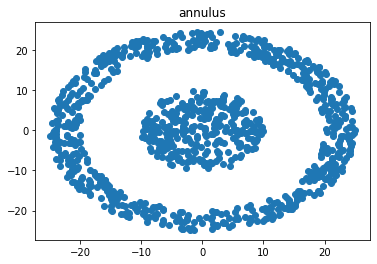

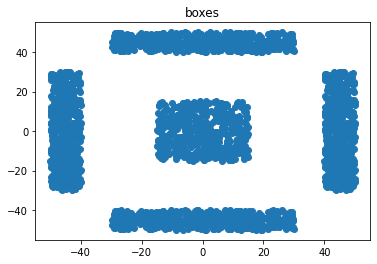

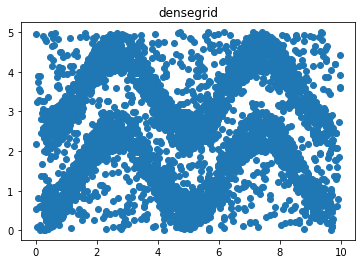

In [4]:
datasets = dict()
for data_file in ['clusters3', 'clusters5', 'clusters5n', 'annulus', 'boxes', 'densegrid']:
    data = np.loadtxt('data_clustering/{}.csv'.format(data_file), delimiter=';')
    datasets[data_file] = data
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(data_file)

## Agglomerative clustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Experiment with *affinity* and *linkage* parameter
- Try to use both stopping criteria: *n_clusters* or *distance_threshold*
- Use clustering for at least 3 datasets

#### Lets use sklearn for the first time

In [15]:
data = datasets['clusters3']

In [20]:
clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
clustering.fit(data)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

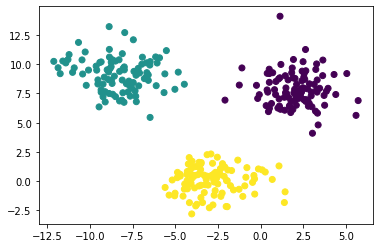

In [21]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

#### Continue with list of tasks for agglomerative clustering

In [32]:
def run_agglo(ds_keys, Ks):
    for ds in ds_keys:
        print(ds)
        data = datasets[ds]
        for K in Ks:
            print(f'\t k -> {K}')
            clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=K, linkage='complete')
            clustering.fit(data)
            clustering.labels_
            
            fig, ax = plt.subplots()
            ax.scatter(data[:,0], data[:,1], c=clustering.labels_)

clusters3
	 k -> 2
	 k -> 3
annulus
	 k -> 2
	 k -> 3


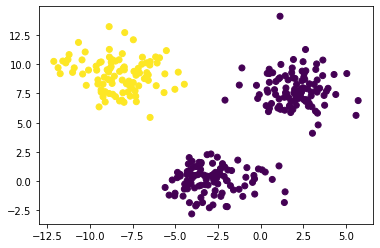

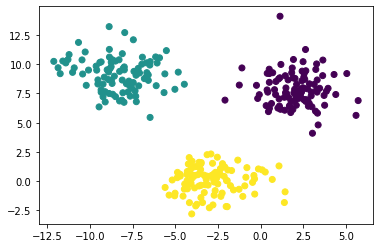

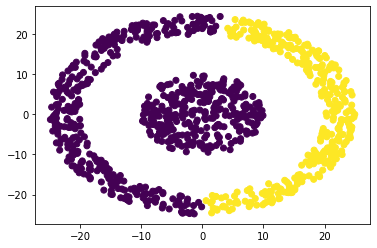

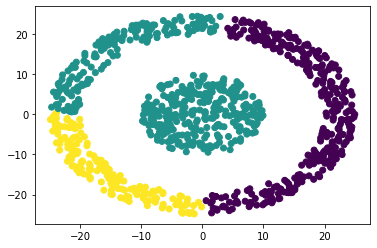

In [33]:
run_agglo(['clusters3', 'annulus'], [2, 3])

## KMeans + clustering quality
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Do you know any technique to determine the best number of clusters?

In [34]:
data = datasets['clusters5']
# data = datasets['clusters5n']
data.shape

(1000, 2)

In [35]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(data)

KMeans(n_clusters=5)

In [40]:
clustering.cluster_centers_

array([[ 10.88773138, -20.07387026],
       [-15.01354427,   7.00205692],
       [ 11.98501702,   1.99751834],
       [ -5.00483096,  -1.85092459],
       [ 18.09563577, -14.12765481]])

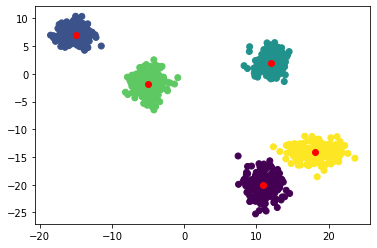

In [41]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], c='r')

In [37]:
clustering.inertia_

4203.872775982063

In [38]:
sklearn.metrics.silhouette_score(data, clustering.labels_)

0.7789930982555275

## Elbow method

In [77]:
data = datasets['clusters5']
# data = datasets['clusters5n']

In [96]:
def get_elbow(f, t, key, p='sse'):
    res = {}
    current_data = datasets[key]
    for k in range(f, t, 1):
        clustering = sklearn.cluster.KMeans(n_clusters=k)
        clustering.fit(current_data)
        res[k] = clustering
        #res['SIL'] = sklearn.metrics.silhouette_score(current_data, clustering.labels_)
        #res['SSE'] = sklearn.metrics.silhouette_score(current_data, clustering.labels_)
    keys = list(res.keys())
    sses = [v.inertia_ for v in res.values()]
    labels = [v.labels_ for v in res.values()]
    sil = [sklearn.metrics.silhouette_score(current_data, l) for l in labels]
    y = sses if p == 'sse' else sil
    plt.plot(keys, y, '-o')
    plt.xticks(keys)
    plt.title(f'{key} - {p}')
    plt.show()
    return res

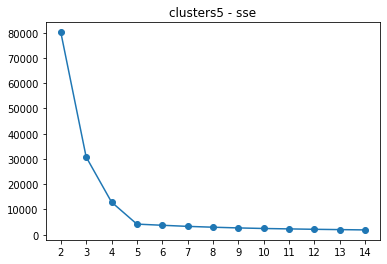

In [97]:
clusters5 = get_elbow(2, 15, 'clusters5')

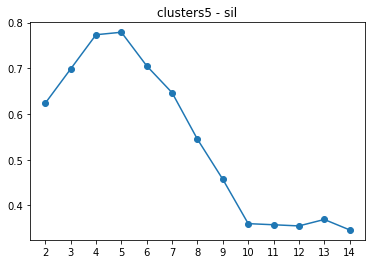

In [98]:
clusters5 = get_elbow(2, 15, 'clusters5', 'sil')

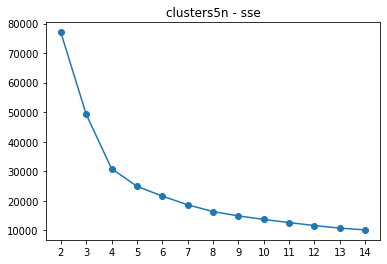

In [99]:
clusters5n = get_elbow(2, 15, 'clusters5n')

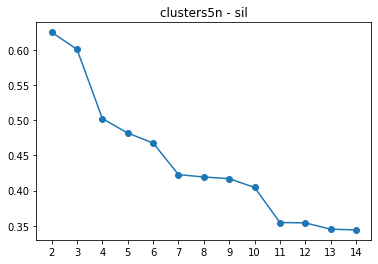

In [100]:
clusters5n = get_elbow(2, 15, 'clusters5n', 'sil')

#### Calculate SSE and Silhouette for differenet parameters of clusters $k \in <2, 15>$. Create visualization for both of clustering quality criteria

#### Go back and try to use elbow method for dataset clusters5n.

#### Can you imagine other quality criteria to use over some real dataset? Do you know difference between external and internal criteria?

## DBSCAN + distance analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

 1    101
 2    100
 0     98
-1      1
dtype: int64


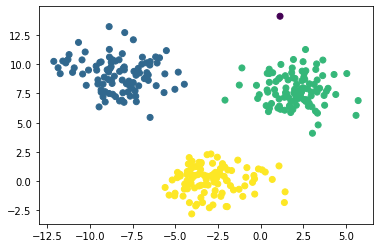

In [142]:
data = datasets['clusters3']
clustering = sklearn.cluster.DBSCAN(eps=2, min_samples=2, metric='euclidean')
clustering.fit(data)
series = pd.Series(clustering.labels_).value_counts()
print(series)
plt.scatter(data[:,0], data[:, 1], c=clustering.labels_)

What does the number -1 means?
#### Find better parameters *eps* and *min_pts* and visualize you result

#### Lets get insight into distances in our dataset and be able to configure our parameters for DBSCAN

In [131]:
distance_matrix = scipy.spatial.distance_matrix(data, data)
distance_matrix

array([[ 0.        ,  1.27626915,  0.84859119, ...,  9.15609135,
         9.93691072,  9.22820479],
       [ 1.27626915,  0.        ,  0.45291392, ..., 10.25086103,
        11.00559463, 10.20192182],
       [ 0.84859119,  0.45291392,  0.        , ...,  9.81106578,
        10.57039706,  9.78461959],
       ...,
       [ 9.15609135, 10.25086103,  9.81106578, ...,  0.        ,
         0.86056813,  1.57964383],
       [ 9.93691072, 11.00559463, 10.57039706, ...,  0.86056813,
         0.        ,  1.46461372],
       [ 9.22820479, 10.20192182,  9.78461959, ...,  1.57964383,
         1.46461372,  0.        ]])

<AxesSubplot:>

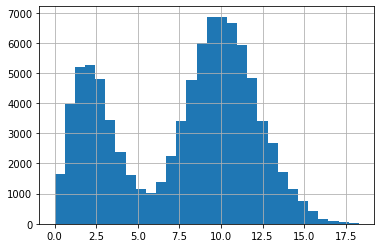

In [132]:
pd.Series(distance_matrix.flatten()).hist(bins=30)

In [133]:
distance_matrix = scipy.spatial.distance_matrix(data, data)
distance_matrix.sort(axis=1)
distance_matrix

array([[ 0.        ,  0.20526724,  0.31089393, ..., 14.816553  ,
        14.95662399, 15.19127016],
       [ 0.        ,  0.27894317,  0.34296939, ..., 15.27538833,
        15.45280726, 16.12021545],
       [ 0.        ,  0.14023545,  0.22455884, ..., 15.03810202,
        15.05619043, 15.71505993],
       ...,
       [ 0.        ,  0.3219196 ,  0.39878835, ..., 12.2329376 ,
        12.64043578, 13.74019586],
       [ 0.        ,  0.31721258,  0.35885252, ..., 13.01849265,
        13.35356325, 13.92083186],
       [ 0.        ,  0.23452593,  0.46406735, ..., 12.30007769,
        12.42338346, 12.46230874]])

<AxesSubplot:>

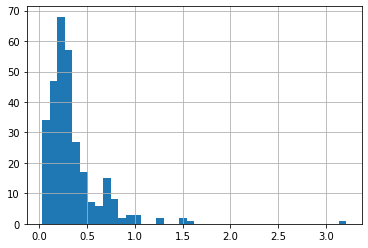

In [134]:
pd.Series(distance_matrix[:, 1]).hist(bins=40)

<AxesSubplot:>

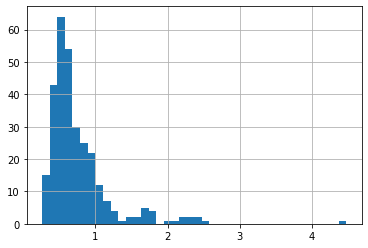

In [135]:
pd.Series(distance_matrix[:, 5]).hist(bins=40)

#### What can we notice in previous visualizations?

### Continue with DBSCAN and try to solve our densegrid dataset

In [154]:
data = datasets['densegrid']

<AxesSubplot:>

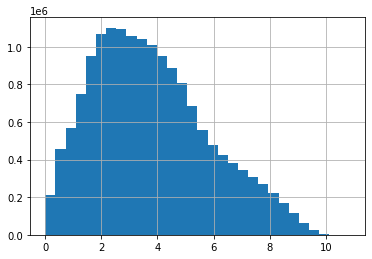

In [155]:
distance_matrix = scipy.spatial.distance_matrix(data, data)
distance_matrix
pd.Series(distance_matrix.flatten()).hist(bins=30)

In [156]:
distance_matrix = scipy.spatial.distance_matrix(data, data)
distance_matrix.sort(axis=1)
distance_matrix

array([[ 0.        ,  0.24167747,  0.28784718, ...,  8.6153181 ,
         8.6188139 ,  8.82644039],
       [ 0.        ,  0.27960866,  0.27987319, ..., 10.72466116,
        10.76820788, 10.82983956],
       [ 0.        ,  0.20541178,  0.25593163, ...,  9.60725627,
         9.64689862,  9.7117173 ],
       ...,
       [ 0.        ,  0.03238827,  0.07102816, ...,  9.53757647,
         9.62943991,  9.87022756],
       [ 0.        ,  0.0731642 ,  0.08570298, ...,  7.39342749,
         7.43366834,  7.57588681],
       [ 0.        ,  0.03231099,  0.03883298, ...,  7.02407325,
         7.11827065,  7.35700917]])

<AxesSubplot:>

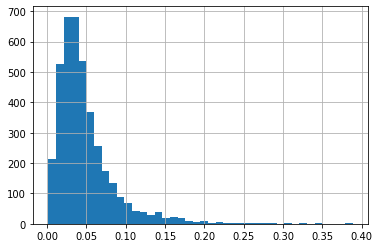

In [157]:
pd.Series(distance_matrix[:, 1]).hist(bins=40)

<AxesSubplot:>

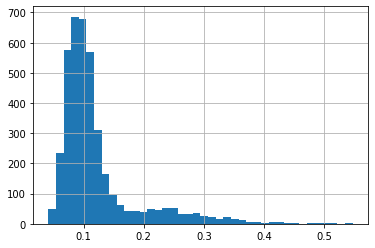

In [170]:
pd.Series(distance_matrix[:, 5]).hist(bins=40)

 1    1785
 0    1781
-1     434
dtype: int64


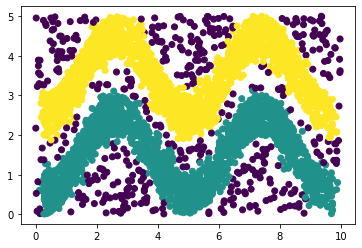

In [174]:
data = datasets['densegrid']
clustering = sklearn.cluster.DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
clustering.fit(data)
series = pd.Series(clustering.labels_).value_counts()
print(series)
plt.scatter(data[:,0], data[:, 1], c=clustering.labels_)

### Take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering